In [26]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv2
import random
import numpy as np
import pandas as pd

In [27]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [28]:
def load_dataset(img_dir):  # Mendefinisikan fungsi load_dataset dengan parameter img_dir
    p = Path(img_dir)  # Membuat objek Path dari img_dir
    dirs = p.glob('*')  # Mendapatkan semua subdirektori di dalam img_dir

    img_list = []  # Menginisialisasi list kosong untuk menyimpan pasangan gambar dan label

    for dir in dirs:  # Loop untuk setiap subdirektori
        label = str(dir).split('\\')[-1]  # Mengambil nama subdirektori sebagai label
        for file in dir.glob('*.jpg'):  # Loop untuk setiap file gambar dengan ekstensi .jpg
            img = mpimg.imread(file)  # Membaca gambar menggunakan mpimg.imread

            if not img is None:  # Memeriksa apakah gambar berhasil dibaca
                img_list.append((img, label))  # Menambahkan pasangan (gambar, label) ke dalam img_list
    
    return img_list  # Mengembalikan img_list yang berisi semua gambar dan label


In [29]:
# Load training data
train_img = load_dataset(train_dir)

In [30]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

In [31]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)
# print(f'Label: {train_img[pick_random]}')

Image 199
(700, 1280, 3)


In [32]:
# Function to Visualize
def random_img_viz(img_list):  # Mendefinisikan fungsi random_img_viz dengan parameter img_list
    rand_num = np.random.randint(0, len(img_list))  # Memilih nomor acak dari img_list

    img = img_list[rand_num][0]  # Mengambil gambar dari img_list pada indeks rand_num
    label = img_list[rand_num][1]  # Mengambil label dari img_list pada indeks rand_num
    label_str = 'day' if label == 1 else 'night'  # Menentukan label string berdasarkan nilai label

    plt.title(f'Label: {label_str}')  # Menambahkan judul pada gambar berdasarkan labe

    print(f'Image Number\t: {rand_num}')  # Mencetak nomor gambar yang diakses
    print(f'Shape\t: {img.shape}')  # Mencetak ukuran gambar
    print(f'Label\t: {label}')  # Mencetak label gambar
    plt.imshow(img)  # Menampilkan gambar menggunakan matplotlib


Label Problem

Image Number	: 228
Shape	: (614, 857, 3)
Label	: night


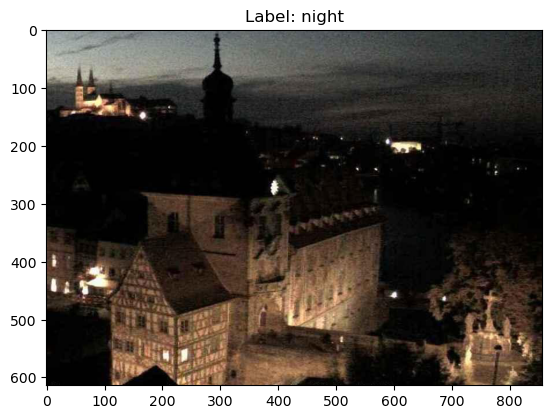

In [51]:
random_img_viz(train_img)

In [34]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [35]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

In [36]:
def preprocess(img_list):  # Mendefinisikan fungsi preprocess dengan parameter img_list
    std_img_list = []  # Menginisialisasi list kosong untuk menyimpan pasangan gambar dan label yang telah distandarisasi

    for item in img_list:  # Loop untuk setiap item dalam img_list
        image = item[0]  # Mengambil gambar dari item
        label = item[1]  # Mengambil label dari item

        # Standarized the image
        std_img = standarized_input(image)  # Menstandarisasi gambar menggunakan fungsi standarized_input

        # Create the label
        img_label = label_encoder(label)  # Mengenkode label menggunakan fungsi label_encoder

        std_img_list.append((std_img, img_label))  # Menambahkan pasangan (gambar yang distandarisasi, label yang dienkode) ke dalam std_img_list
    
    return std_img_list  # Mengembalikan std_img_list yang berisi semua gambar dan label yang telah diproses


In [37]:
train_std_img_list = preprocess(train_img)

In [38]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))  # Memilih nomor acak dari train_std_img_list

# Check img size
print(f'Image {pick_random}')  # Mencetak nomor gambar yang diakses
print(train_std_img_list[pick_random][0].shape)  # Mencetak ukuran gambar yang diakses

Image 52
(600, 1100, 3)


Image Number	: 192
Shape	: (600, 1100, 3)
Label	: 0


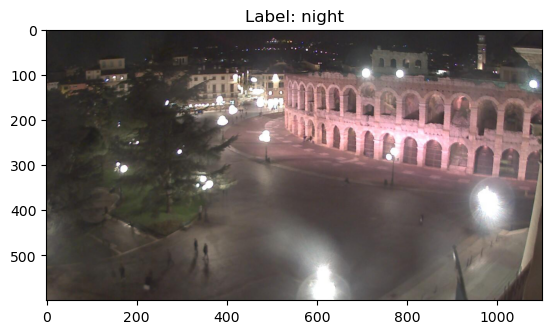

In [57]:
random_img_viz(train_std_img_list)

In [40]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):  # Mendefinisikan fungsi avg_brightness dengan parameter image
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # Mengkonversi gambar dari RGB ke HSV menggunakan OpenCV

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2])  # Menghitung jumlah total nilai kecerahan (V channel) dari gambar HSV
    area = image.shape[0] * image.shape[1]  # Menghitung luas area gambar (jumlah piksel)
    avg = sum_brightness / area  # Menghitung rata-rata kecerahan dengan membagi jumlah total kecerahan dengan luas area

    return avg  # Mengembalikan nilai rata-rata kecerahan

Image: 180
Avg Brighness: 35.9771


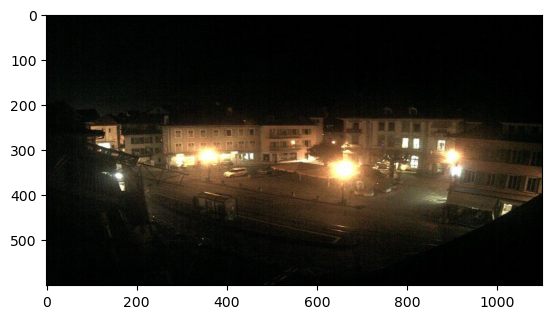

In [41]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))  # Memilih nomor acak dari train_std_img_list

feature_img = train_std_img_list[rand_img][0]  # Mengambil gambar dari train_std_img_list pada indeks rand_img

avg_img = avg_brightness(feature_img)  # Menghitung rata-rata kecerahan gambar menggunakan fungsi avg_brightness

print(f'Image: {rand_img}')  # Mencetak nomor gambar yang diakses
print(f'Avg Brighness: {avg_img:.4f}')  # Mencetak rata-rata kecerahan gambar dengan format 4 desimal
plt.imshow(feature_img)  # Menampilkan gambar menggunakan matplotlib


In [42]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1
    
    return pred

Image 23
Actual label: 1
Predicted label: 1


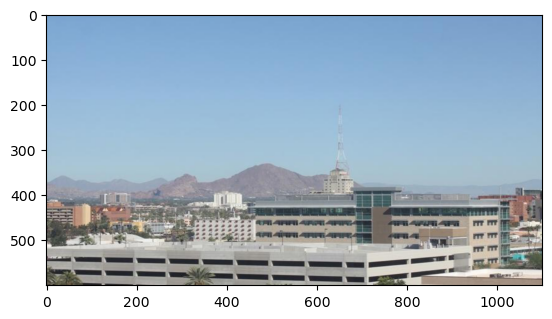

In [43]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))  # Memilih nomor acak dari train_std_img_list

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)  # Memprediksi label gambar menggunakan fungsi predict_label dengan threshold 120

# Evaluate
print(f'Image {rand_img}')  # Mencetak nomor gambar yang diakses
print(f'Actual label: {train_std_img_list[rand_img][1]}')  # Mencetak label asli dari gambar
print(f'Predicted label: {pred}')  # Mencetak label yang diprediksi
plt.imshow(train_std_img_list[rand_img][0])  # Menampilkan gambar menggunakan matplotlib


In [44]:
def evaluate(img_list, threshold): 
    miss_labels = []  # Inisialisasi list kosong untuk menyimpan gambar yang salah prediksi

    for file in img_list:  
        # Mengiterasi setiap file (gambar dan labelnya) di dalam list img_list
        img = file[0]  
        # Mengambil gambar dari elemen pertama tuple (img, label)
        label = file[1]  
        # Mengambil label yang benar dari elemen kedua tuple (img, label)

        pred_label = predict_label(img, threshold)  
        # Mendapatkan prediksi label untuk gambar menggunakan fungsi predict_label dengan threshold tertentu

        if pred_label != label:  
            # Membandingkan label prediksi dengan label yang benar
            miss_labels.append((img, pred_label, label))  
            # Jika prediksi salah, tambahkan gambar, label prediksi, dan label benar ke miss_labels
    
    total_img = len(img_list)  
    # Menghitung total jumlah gambar dalam img_list
    corr_pred = total_img - len(miss_labels)  
    # Menghitung jumlah prediksi yang benar (total gambar dikurangi jumlah kesalahan)
    accuracy = corr_pred / total_img  
    # Menghitung akurasi dengan membagi jumlah prediksi yang benar dengan total gambar

    print(f'Accuracy: {accuracy:.4f}')  
    # Menampilkan akurasi dengan format 4 digit desimal

In [45]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [46]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [47]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [48]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)  
# Menjalankan fungsi untuk mengekstrak fitur rata-rata brightness dari list gambar yang sudah di-standarkan (train_std_img_list)
print(f'Shape: {train_avg_img.shape}')  
# Menampilkan dimensi dari array hasil ekstraksi fitur rata-rata brightness
train_avg_img.head()  
# Menampilkan beberapa baris awal dari data hasil ekstraksi (biasanya digunakan pada DataFrame)

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,1.0
1,192.954773,1.0
2,132.141432,1.0
3,199.784797,1.0
4,109.964702,1.0


In [49]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.267453,1.0
1,157.844245,1.0
2,201.646592,1.0
3,191.273192,1.0
4,188.152729,1.0


In [50]:
# Import required library
from sklearn.svm import SVC  
# Mengimpor library SVC (Support Vector Classifier) dari Scikit-learn yang digunakan untuk klasifikasi

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)  
# Memisahkan fitur (kolom pertama) dari dataset `train_avg_img` sebagai data pelatihan (X_train), kemudian mengubah bentuknya menjadi array 2D
y_train = train_avg_img.iloc[:,1]  
# Memisahkan label (kolom kedua) dari dataset `train_avg_img` sebagai label pelatihan (y_train)
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)  
# Memisahkan fitur (kolom pertama) dari dataset `test_avg_img` sebagai data uji (X_test), dan mengubah bentuknya menjadi array 2D
y_test = test_avg_img.iloc[:,1]  
# Memisahkan label (kolom kedua) dari dataset `test_avg_img` sebagai label uji (y_test)

model = SVC()  
# Membuat instance dari model Support Vector Classifier (SVC) untuk melakukan klasifikasi
model.fit(X_train, y_train)  
# Melatih model dengan data pelatihan (X_train) dan label pelatihan (y_train)


SVC()

In [58]:
from sklearn.metrics import accuracy_score  
# Mengimpor fungsi `accuracy_score` dari sklearn untuk menghitung akurasi model

# Make a prediction on train data
y_train_pred = model.predict(X_train)  
# Menggunakan model yang sudah dilatih untuk memprediksi label pada data pelatihan (X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)  
# Menghitung akurasi model pada data pelatihan dengan membandingkan label asli (y_train) dan prediksi model (y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)  
# Menggunakan model yang sama untuk memprediksi label pada data uji (X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)  
# Menghitung akurasi model pada data uji dengan membandingkan label asli (y_test) dan prediksi model (y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')  
# Menampilkan akurasi model pada data pelatihan
print(f'Accuracy on test: {acc_test}')  
# Menampilkan akurasi model pada data uji


Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
